# Introduction to ML with Scikit-Learn
scikit-learn is a free and open-source library for the Python programming language. Lots of machine learning algorithms are implemented in the scikit-learn library. The application of these algorithms is just the same. We describe some of the basic capabilities of this library by explaining a very simple machine learning toy project.

We are following these steps:
1. Problem Description
2. Data Preparation/Loading
3. Feature Selection
4. Configuring the ML Algorithm (Specifying the ML algorithm and its parameters)
5. Train the Model
6. Prediction and Evaluation
7. Hyperparameter Tuning

## Problem Description
We want to specify the iris species based on the sepal and petal length and width.

## Data Preparation/Loading
We can generate our data (e.g. use numpy) or reading data from files (particularly, csv files).<br>
However, in this example we use a toy dataset, iris, from sklearn package itself which is about iris flowers.

### Data Loading

In [1]:
from sklearn import datasets

# Loading dataset
iris = datasets.load_iris() # return class:~sklearn.utils.Bunch (Dictionary-like object)
print("The dataset shape: ", iris.data.shape)
print("Feature names: ", iris.feature_names)
print("The iris species: ", iris.target_names)

The dataset shape:  (150, 4)
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The iris species:  ['setosa' 'versicolor' 'virginica']


In [2]:
# Convert iris data and target to the Pandas DataFrame format
import pandas as pd
iris_df =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

## Feature Selection
Decide which features of the dataset do you want to use. Here we only use some visualization techniques: Heatmap of the correlation matrix and boxplot.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

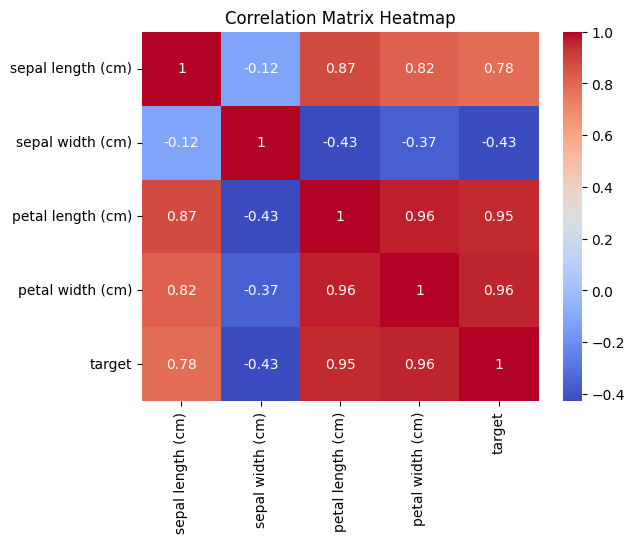

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr = iris_df.corr()

# Create a heatmap
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [4]:
# Map target values to species names for better visualization
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Rename long column names with the shorter ones
iris_df.rename(columns = {'sepal length (cm)': 'sepal len', 
                          'sepal width (cm)': 'sepal wid', 
                          'petal length (cm)': 'petal len', 
                          'petal width (cm)': 'petal wid'}, inplace=True)
iris_df.head()

,sepal len,sepal wid,petal len,petal wid,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


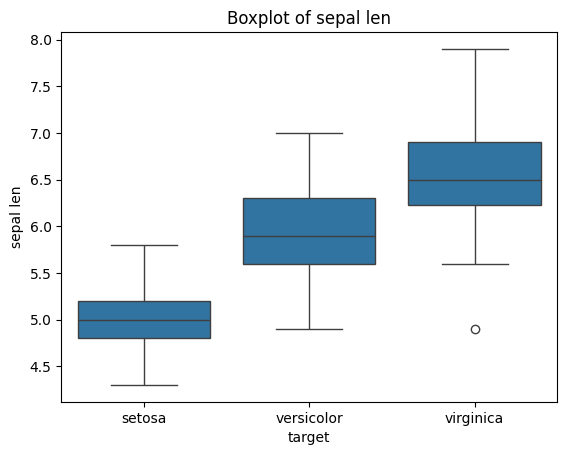

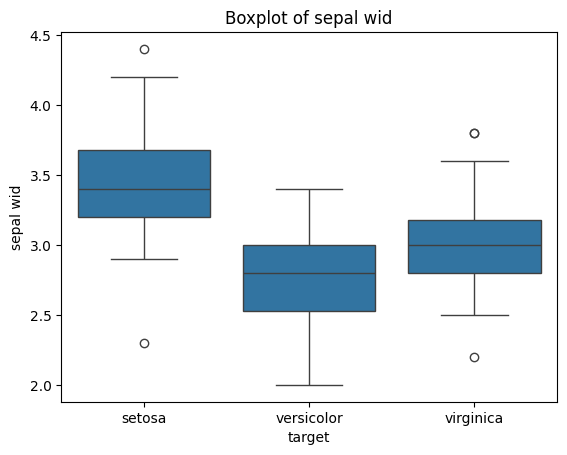

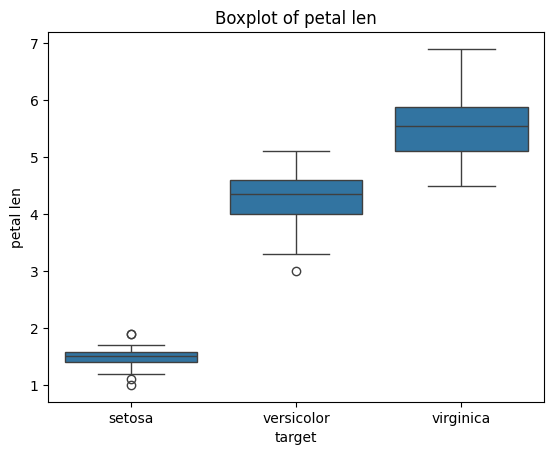

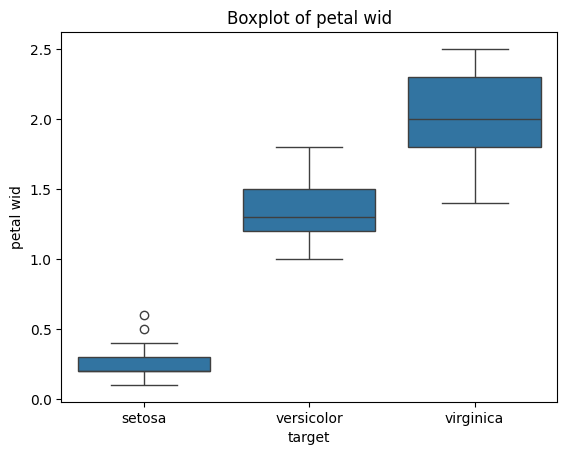

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create boxplots for each feature
for column in iris_df.columns[:-1]:
    sb.boxplot(x='target', y=column, data=iris_df)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:
# Choose two features => The algorithm will decide about classification based on these features
x=iris.data[:, [2, 3]] # In this example we chose the 3rd and 4th features (columns)
y=iris.target

## Configuring the ML Algorithm

Assume that we decide to use K-Nearest Neighbors (KNN) algorithm to classify the iris flowers. We use scikit-learn KNN classifier and configure its parameters.<br>
KNN parameters:
- n_neighbors = number of neighbors to be considered for detection
- metric = How to calculate the distance between points
> - Most common distance meytrics:
>> 1. Euclidean distance: $\sqrt{\Sigma(x_i - y_i)^2}$
>> 2. Manhattan distance: $\Sigma|x_i - y_i|$
>> 3. Minkowski distance (general form of distance): $\sqrt[p]{\Sigma|x_i - y_i|^p}$
>>> - $p = 1 \rightarrow Manhattan$
>>> - $p = 2 \rightarrow Euclidean$
>>> - $p = \infty \rightarrow Chebyshev$ ($\lim _{p \rightarrow \infty}\left(\sum_{i=1}^n\left|x_i-y_i\right|^p\right)^{\frac{1}{p}}=\max _{i=1}^n\left|x_i-y_i\right|$). It means that we can go as a king of chess! In other words, all kinds of movements (horizontal, vertical, or diagonal) are one-steps.


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric='minkowski', p = 2) # Minkowski and p=2 are the default arguments which means Euclidean distance
# Use 'cityblock' for Manhattan, 'euclidean' for Euclidean, and 'minkowski' for Minkowski

## Train the Model
Fit data to the model in order to train the model

In [8]:
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

## Prediction & Evaluation

In [9]:
# Predicting the class of a new instance
import numpy as np
predicted_y = knn.predict([[5, 2], [2, 1], [3, 3]])
print("predicted labels for [5, 2] , [2, 1], and [3, 3] are", predicted_y)

predicted labels for [5, 2] , [2, 1], and [3, 3] are [2 0 1]


In [10]:
# Evaluation: testing the result

# spliting train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Train
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)

# Test
knn.score(x_test, y_test) # Return the mean accuracy on the given test data and labels. Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome.

0.9333333333333333

## Train-Test Split
train_test_split(), by default, split the whole data into the train and test partitions randomly. In other words, it shuffles the data and hence we get different results in each run. We can use the argument shuffle to configure this behavior.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.5777777777777777

Why we get such a bad result? Because, the function with shuffle=False splits the data by simply slicing it. This means the training set is taken from the beginning of the dataset and the test set from the end. In the iris dataset, the data is sorted based on the species. So, It is entirely reasonable to arrive at that conclusion. See the data again:

In [12]:
iris_df

,sepal len,sepal wid,petal len,petal wid,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Considering the above mentioned problem, we should select random samples. However, we prefer to get the same results each time running the code. To satisfy these two requirements simultanously, we can use the random_state argument in the train_test_split function. If we set the random_state parameter to a fix integer, the function randomly selects train and test data, but all runs work with same splits.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state = 34)
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9777777777777777

A popular value chosen all over the world for the random state is 42. The number simply has been made popular by a comic science fiction called "The Hitchhiker's Guide to the Galaxy" in 1978.

In this novel, a supercomputer takes seven and a half million years to compute the answer to the ultimate question of Life, The Universe and Everything. The answer turns out to be 42. However, the exact question for which it has found the answer is either lost to time or wasn't known in the first place.

But why we do not use 42 in the above example? Simply, because of the bad result! See the result of the following cell:

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

1.0

There is another argument, *stratify*, which makes sure that the proportion of samples does not change. e.g. if we have 100 labels including 40 L1 and 60 L2, 40% of selected samples are chosen from L1 and 60% from L2. We will discuss this option in the later lectures. The usage is `stratify = axis (e.g. y)`

## Hyperparameter Tuning
Why n_neighbors set to 6?

The answer: Test it!

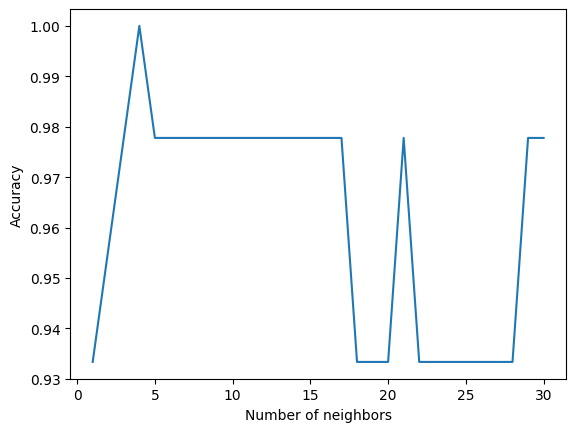

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state = 34)

# Test for different number of neighbors [1-30]:
test_range = 30
neighbors=np.arange(1,30)
test_accuracy=np.empty(test_range)
for k in range(1, test_range + 1):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train)
    test_accuracy[k-1] = knn_model.score(x_test, y_test)   
plt.plot(range(1, test_range + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

The best accuracy is achieved for n_neighbors = 4.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state = 34)
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

1.0

It is perfect. Isn't it?

No. This leads the model to overfit the new samples. 

There are two important concepts is machine learning models:
- Under-fitting: too simple to explain the variance
- Over-fitting: too-good to be true (noise may be enumerated)

## Cross-Validation
In the previous evaluations, we split the data into the test and training partitions. We saw that changing these partitions (e.g. by changing the random_state or even discarding it), will change the score. So, which score should we report?

The answer: Repeat the test and report the mean score. This method is called cross-validation.

k-fold cross-validation means splitting the (training) data into k folds, then training the model k times, holding out a different fold each time for evaluation.

Cross-validation is also used for hyperparameter selection. We will discuss this topic in later lectures.

In [18]:
# Evaluation by k-folds cross-validation method
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)

from sklearn.model_selection import cross_val_score

# The cross_val_score() function repeats the train-test process K times
scores = cross_val_score(knn, x, y, cv=5) # CV = Number of folds (K) = 5
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [19]:
# Error = mean of errors for all iterations
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.02


## Linear Regression

The linear regression algorithm tries to find the line that has, on average, the minimum distance to each observation. The line is said to be the "best-fitting line." Assume that the x and y show the feature and target respectively. The algorithm finds the best 'a' and 'b' in the linear equation $y = ax + b$. The best 'a' and 'b' should minimize the sum of the vertical distance between each point and the prediction line which is called Ordinary Least Squares (OLS).

More general case: For $n$ different features, the algorithm should find $n + 1$ coefficients in $y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$

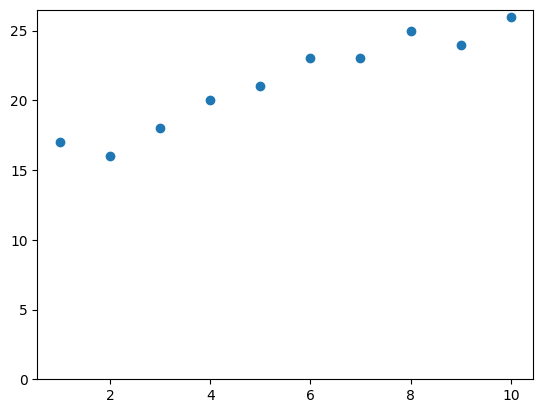

In [20]:
# Sample data
x = np.arange (1, 11)
y = np.array([17, 16, 18, 20, 21, 23, 23, 25, 24, 26])

# Convert vector (one-row) to one-column matrix
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Visualize data
plt.scatter(x,y)
plt.ylim(bottom=0);

In [21]:
# Train the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)
# Predict for already exist Xs
y_predicted = reg.predict(x)

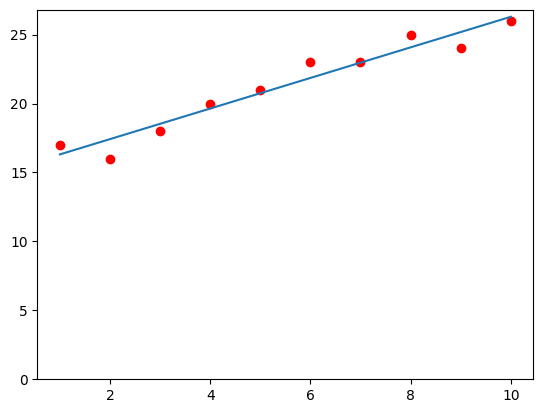

In [22]:
# Visualize the result
plt.plot(x, y_predicted)
plt.scatter(x, y, c='red')
plt.ylim(bottom=0);

How good is our model? The lower the distance (error) between the predicted and real values, the better the model. So, we should calculate this error. RMSE (Root Mean Square Error) is a common error calculation method. RSME measures the average difference between the predicted values by the model and the actual values using the following formula.
$$\sqrt{\frac{1}{m} \sum_{i=1}^m(y^i - \hat y^i)^2}$$

In [23]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y, y_predicted)

0.8135220844071672